1. Importing tools and visualising data
2. Show maximum correlation with the dependent variable
3. Create and train a suitable regression machine learning model that predicts the overall rating score of a player based on his attributes
4. Measure the performance of the model and fine tune it as a process of optimisation
5. Use fifa19 data to test how good the model is

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import  LinearRegression, LogisticRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error


In [37]:
#reading the csv file
df = pd.read_csv('/content/drive/MyDrive/r204560p/players_20.csv')


In [38]:
print(df.head())

   sofifa_id                                         player_url  ...   rcb    rb
0     158023  https://sofifa.com/player/158023/lionel-messi/...  ...  52+2  63+2
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...  ...  53+3  61+3
2     190871  https://sofifa.com/player/190871/neymar-da-sil...  ...  46+3  61+3
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...  ...   NaN   NaN
4     183277  https://sofifa.com/player/183277/eden-hazard/2...  ...  49+3  61+3

[5 rows x 104 columns]


In [39]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [41]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [42]:
# iterate through the column to find non usefull column

for cols in df.columns:
  print(cols)


sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

In [43]:
df_null_val = df[df.isnull().any(axis=1)]
print(df_null_val.head())

   sofifa_id                                         player_url  ...   rcb    rb
0     158023  https://sofifa.com/player/158023/lionel-messi/...  ...  52+2  63+2
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...  ...  53+3  61+3
2     190871  https://sofifa.com/player/190871/neymar-da-sil...  ...  46+3  61+3
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...  ...   NaN   NaN
4     183277  https://sofifa.com/player/183277/eden-hazard/2...  ...  49+3  61+3

[5 rows x 104 columns]


In [44]:
# dropping columns with object data type leaving int and float

df_objects = (df.dtypes == 'object')
df_object_cols = list(df_objects[df_objects].index)
df = df.drop(df_object_cols, axis=1)
print(df)

       sofifa_id  age  ...  goalkeeping_positioning  goalkeeping_reflexes
0         158023   32  ...                       14                     8
1          20801   34  ...                       14                    11
2         190871   27  ...                       15                    11
3         200389   26  ...                       90                    89
4         183277   28  ...                        8                     8
...          ...  ...  ...                      ...                   ...
18273     245006   22  ...                        5                    14
18274     250995   22  ...                       11                     9
18275     252332   19  ...                        6                    14
18276     251110   18  ...                       13                    13
18277     233449   26  ...                        9                    10

[18278 rows x 61 columns]


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18278 non-null  int64  
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   overall                     18278 non-null  int64  
 5   potential                   18278 non-null  int64  
 6   value_eur                   18278 non-null  int64  
 7   wage_eur                    18278 non-null  int64  
 8   international_reputation    18278 non-null  int64  
 9   weak_foot                   18278 non-null  int64  
 10  skill_moves                 18278 non-null  int64  
 11  release_clause_eur          16980 non-null  float64
 12  team_jersey_number          18038 non-null  float64
 13  contract_valid_until        180

In [46]:
# drop non useful columns with int data type

df = df.drop(['sofifa_id', 
             'height_cm', 
             'weight_kg', 
             'value_eur', 
             'wage_eur', 
             'international_reputation', 
             'weak_foot',
             'skill_moves',
             'release_clause_eur',
             'team_jersey_number',
             'contract_valid_until',
             'nation_jersey_number'],axis=1)

In [47]:
# searching if we have null vlues in the data

df_null_val = df[df.isnull().any(axis=1)]
print(df_null_val.head())

   age  overall  ...  goalkeeping_positioning  goalkeeping_reflexes
0   32       94  ...                       14                     8
1   34       93  ...                       14                    11
2   27       92  ...                       15                    11
3   26       91  ...                       90                    89
4   28       91  ...                        8                     8

[5 rows x 49 columns]


In [48]:
# filling the null positon with the median values

df = df.fillna(df.median())


In [49]:
df.shape

(18278, 49)

In [50]:
# conveting floats to int 

df = df.astype(int)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age                         18278 non-null  int64
 1   overall                     18278 non-null  int64
 2   potential                   18278 non-null  int64
 3   pace                        18278 non-null  int64
 4   shooting                    18278 non-null  int64
 5   passing                     18278 non-null  int64
 6   dribbling                   18278 non-null  int64
 7   defending                   18278 non-null  int64
 8   physic                      18278 non-null  int64
 9   gk_diving                   18278 non-null  int64
 10  gk_handling                 18278 non-null  int64
 11  gk_kicking                  18278 non-null  int64
 12  gk_reflexes                 18278 non-null  int64
 13  gk_speed                    18278 non-null  int64
 14  gk_pos

In [52]:
df.columns

Index(['age', 'overall', 'potential', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicki

In [53]:
#selecting features to use from the column


df_feature =['age', 'overall', 'potential', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']
       
fifa_player = df[df_feature]

In [54]:
fifa_player.describe()

,age,overall,potential,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,66.244994,71.546887,67.845607,52.487854,57.319127,62.695153,52.048802,65.001805,65.047051,63.016304,61.092734,66.043495,38.866178,63.930353,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,4.656964,6.949953,6.139669,10.657660,13.235769,9.813993,9.706187,15.541085,9.207275,2.584857,2.417622,2.519821,2.723617,3.568437,2.825740,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,16.000000,48.000000,49.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,62.000000,67.000000,63.000000,44.000000,52.000000,58.000000,39.000000,60.000000,65.000000,63.000000,61.000000,66.000000,39.000000,64.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.000000,55.000000,56.000000,56.000000,48.000000,58.000000,56.000000,58.000000,32.000000,44.000000,25.000000,39.000000,44.000000,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,69.000000,54.000000,58.000000,64.000000,56.000000,66.000000,65.000000,63.000000,61.000000,66.000000,39.000000,64.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,66.000000,51.000000,58.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,71.000000,75.000000,74.000000,62.000000,63.000000,69.000000,64.000000,71.000000,65.000000,63.000000,61.000000

In [55]:
fifa_player.shape

(18278, 49)

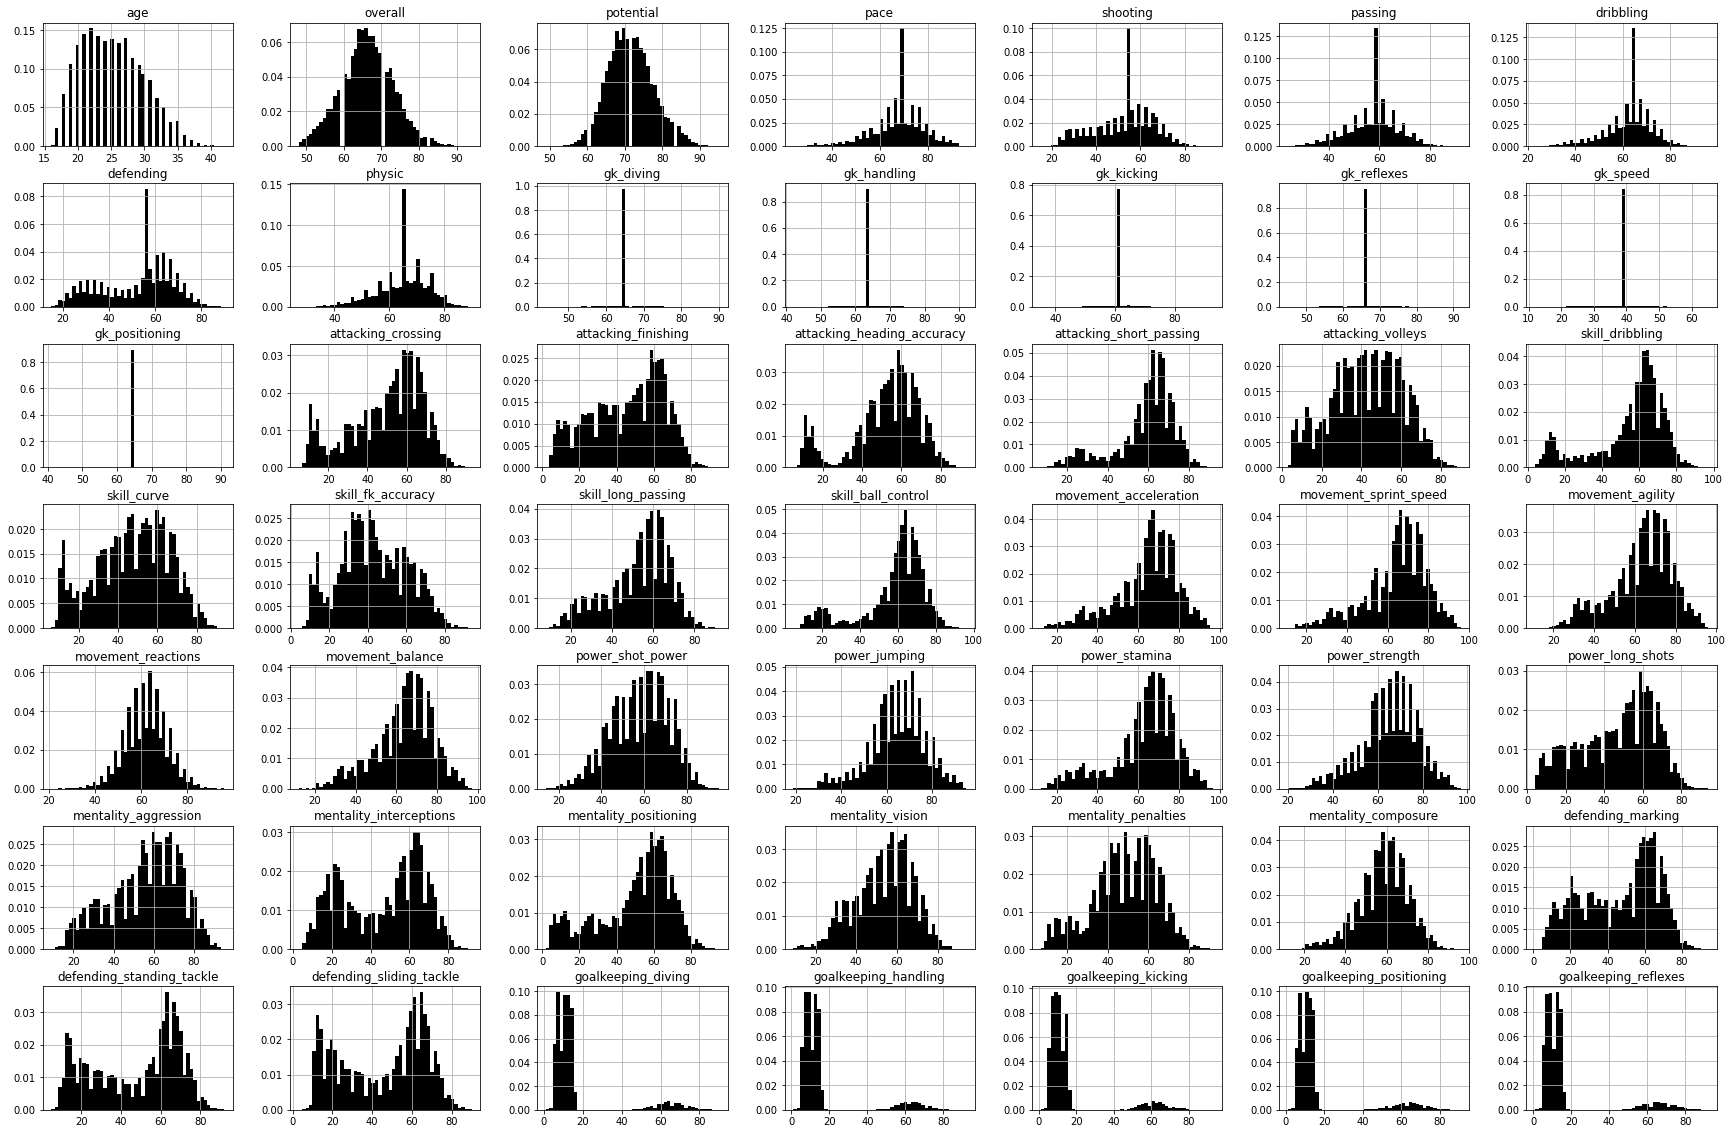

In [56]:
# getting the overview of the data using a histogram

fifa_player.hist(bins=50, figsize=(30,20), color='black', density=True, histtype='stepfilled', rwidth=0.8)
plt.show()

In [57]:
#scaling the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [58]:
#splitting the data into test and train set

train, test =train_test_split(fifa_player,test_size=0.2 ,random_state=42)

CORRELATION

In [59]:
# looking for relationship in the data

corr_test = train.copy()
correlation_matrix = corr_test.corr()
correlation_matrix['overall'].sort_values(ascending=False)

overall                       1.000000
movement_reactions            0.865583
mentality_composure           0.719927
potential                     0.646661
passing                       0.634075
power_shot_power              0.570048
dribbling                     0.554950
mentality_vision              0.509595
attacking_short_passing       0.506783
skill_long_passing            0.492170
physic                        0.480335
age                           0.462461
skill_ball_control            0.461000
shooting                      0.460185
power_long_shots              0.428551
skill_curve                   0.418644
mentality_aggression          0.404848
attacking_volleys             0.398905
attacking_crossing            0.392936
skill_fk_accuracy             0.391248
skill_dribbling               0.375421
power_stamina                 0.373520
power_strength                0.364329
mentality_positioning         0.359833
attacking_heading_accuracy    0.352435
mentality_penalties      

In [60]:
#scatter plotting for movement_reactions since they seem more corelated with y

print(correlation_matrix)

                                 age  ...  goalkeeping_reflexes
age                         1.000000  ...              0.104942
overall                     0.462461  ...             -0.017474
potential                  -0.265049  ...             -0.051825
pace                       -0.183868  ...              0.037115
shooting                    0.223303  ...              0.045186
passing                     0.305619  ...              0.030995
dribbling                   0.152654  ...              0.050507
defending                   0.241381  ...              0.090292
physic                      0.404930  ...              0.044200
gk_diving                   0.162947  ...              0.179456
gk_handling                 0.177019  ...              0.127207
gk_kicking                  0.154321  ...              0.205572
gk_reflexes                 0.160922  ...              0.184538
gk_speed                    0.121174  ...             -0.031962
gk_positioning              0.202224  ..

showing only for the features whose corelation value is above 0.5

In [61]:
# selection of features for individual perfomance of a player

corr_features = ['overall', 
                 'movement_reactions', 
                 'mentality_composure',
                 'potential',
                 'passing', 
                 'dribbling',
                 'power_shot_power', 
                 'mentality_vision',
                 'attacking_short_passing',
                 ] 

Creating Regression Models and choosing the best from their score


In [62]:
train = train[corr_features]
test = test[corr_features]


In [63]:
y_train = train['overall']
X_train = train.drop('overall', axis=1)
y_valid = test['overall']
X_valid = test.drop('overall', axis=1)

In [64]:
classifiers = [
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    XGBRegressor()
]

In [65]:
#defining plotting tools

def predictions_plotting(X_valid, y_valid,model,model_name=""):
    predictions = model.predict(X_valid)
    plt.scatter(y_valid,predictions)
    plt.xlabel("RatingsPredicted")
    plt.ylabel("ActualRatings")
    plt.title(model_name)

In [66]:
classifiers_graph_labels = [
    'RandomForest',
    'Decision Tree',
    'Linear Regression',
    'XGBregressor'
]

$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*
Fitting 'RandomForest' regressor
Name: RandomForest Score: 0.91 Time 5.2560 secs


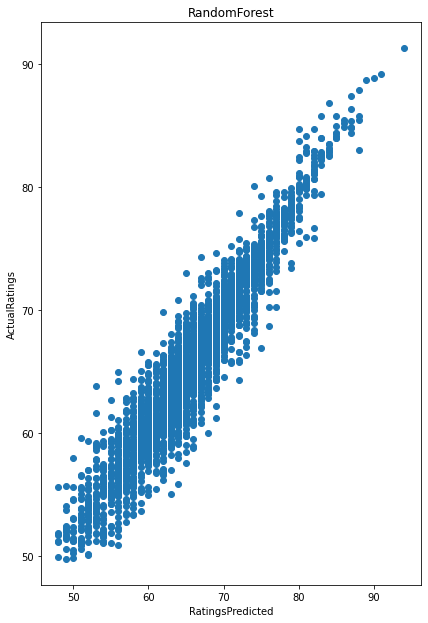

$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*
Fitting 'Decision Tree' regressor
Name: Decision Tree Score: 0.81 Time 0.0868 secs


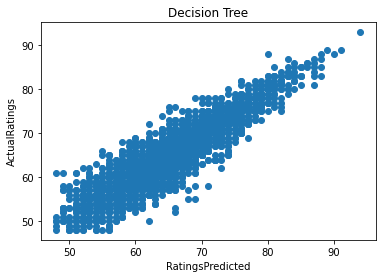

$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*
Fitting 'Linear Regression' regressor
Name: Linear Regression Score: 0.84 Time 0.0315 secs


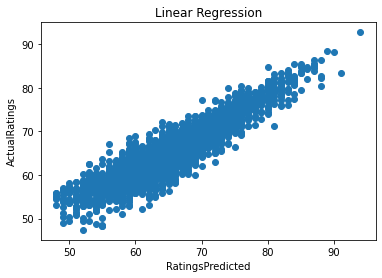

$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*$#*
Fitting 'XGBregressor' regressor
[14:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Name: XGBregressor Score: 0.89 Time 0.7212 secs


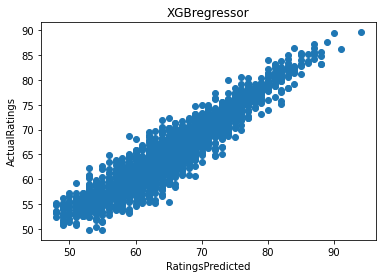

In [67]:
regressor_data = pd.DataFrame(columns = ["Name", "Score", "Training_Time"])
fig = plt.figure(figsize = (15,60))
i = 0
for name, clf in zip(classifiers_graph_labels, classifiers):
    print('$#*'*20)
    print("Fitting '%s' regressor"%name)
    t0 = time.time()
    clf.fit(X_train, y_train)

    t1 = time.time()
    preds = clf.predict(X_valid)
    result = r2_score(y_valid, preds)

    print("Name: %s Score: %.2f Time %.4f secs" % (name, result, t1-t0))
    ax = fig.add_subplot(5,2,i+1)
    predictions_plotting(X_valid, y_valid, clf, name)
    regressor_data.loc[i] = [name, result, t1-t0]
    i+=1
    plt.show()

In [68]:
# Sorting the results of the regressors by their score

regressor_data.sort_values(by="Score", ascending = False)

,Name,Score,Training_Time
0,RandomForest,0.909180,5.256023
3,XGBregressor,0.893187,0.721158
2,Linear Regression,0.842955,0.031505
1,Decision Tree,0.808349,0.086841


From the table RandomForest is the one that is on first position hence
am going to use it and tune it

In [69]:
#training the model using the train set and measuring mean absolute error

forest_model = RandomForestRegressor(random_state=500)
forest_model.fit(X_train, y_train)
my_preds = forest_model.predict(X_valid)
print(mean_absolute_error(y_valid, my_preds))

1.4971006564551421


In [70]:
#cross validation of the model for perfomance

from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_model, X_train, y_train,scoring='neg_mean_squared_error', cv=10)
lin_reg_scores = np.sqrt(-scores)
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard Deviation:", scores.std())
display_scores(lin_reg_scores)

Scores: [2.21460431 2.12741226 2.09563102 2.07475221 2.1611485  2.09841315
 2.11027736 2.14957265 2.12375793 2.03320058]
Mean: 2.1188769959627827
Standard Deviation: 0.04723350591394626


In [71]:
#fine tuning the model to measure its perfomance
forest_model = RandomForestRegressor(n_estimators=100, n_jobs=1000,min_samples_leaf=1000,max_depth=1000)
forest_model.fit(X_train, y_train)
preds = forest_model.predict(X_valid)
print(mean_absolute_error(y_valid, preds))

2.660088291038715


In [72]:
import pickle

filename = "fifa_model"
pickle.dump(forest_model, open(filename, 'wb'))

EVALUATING THE MODEL ON PLAYER_19 DATASET


In [73]:
df3 = pd.read_csv('/content/drive/MyDrive/r204560p/players_19.csv')

In [74]:
df3.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [75]:
cor = ['overall', 
      'movement_reactions', 
      'mentality_composure',
      'potential',
      'passing', 
      'dribbling',
      'power_shot_power', 
      'mentality_vision',
      'attacking_short_passing'
                 ] 


In [76]:
df3_player = df3[cor]
df3_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   overall                  17770 non-null  int64  
 1   movement_reactions       17770 non-null  object 
 2   mentality_composure      17770 non-null  object 
 3   potential                17770 non-null  int64  
 4   passing                  15784 non-null  float64
 5   dribbling                15784 non-null  float64
 6   power_shot_power         17770 non-null  object 
 7   mentality_vision         17770 non-null  object 
 8   attacking_short_passing  17770 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.2+ MB


In [77]:

df3_player = df3_player.astype(int)
df3_player = df3_player.fillna(df3_player.median())
df3_player.info()

ValueError: ignored

In [ ]:
y22 = df3_player['overall']
X = df3_player.drop('overall', axis=1)
predictions = forest_model.predict(X)
print("Mean Absolute Error: " + str(mean_absolute_error( y22,predictions)))
